<a href="https://colab.research.google.com/github/Johno4308/ML_googleColab/blob/main/Free_Code_Camp_ML_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

FREE CODE CAMP:
WHERE THE DATASET WAS FOUND
The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere.
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [4]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fAsym", "fM3Loong", "fM3Trans", "fAplha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head() #head is first 5 things

,fLength,fWidth,fSize,fConc,fAsym,fM3Loong,fM3Trans,fAplha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Loong,fM3Trans,fAplha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
# checking for comminality in gamma fLength column
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [7]:
# section out the data into the three categories
# 60% for test, 20% for valid (60 to 80), and 20% for test (the rest)
# print(df.shape)
df = df.sample(frac=1).reset_index(drop=True)
train, valid, test = np.split(df, [int(0.6*len(df)), int(0.8*len(df))])

In [28]:
# scaling the columns, making the function
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # to resample as there are more gamma then hadron
  # basically keep sampling for the less class in increase the size of our data set
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))


  return data, X, y

In [ ]:
# seeing how many of each
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hadron

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [31]:
# the effects for RandomOverSampler
len(y_train)

14778

In [32]:
sum(y_train == 1)

7389

In [33]:
sum(y_train == 0)

7389

# K NEAREST NEIGHBORS

In [13]:
# define a distance function - euclidean distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [34]:
# the argument is how many neighbors we want to use
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
y_pred = knn_model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1341
           1       0.82      0.89      0.86      2463

    accuracy                           0.81      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.81      0.80      3804



# MODEL - NAIVE BAYES RULE
# Formula: P(A|B) = (P(B|A) * P(A)) / P(B)
Prior Probability (P(A)): It represents the probability of an event A occurring without considering any additional evidence.

Likelihood (P(B|A)): It denotes the probability of observing evidence B given that event A has occurred. In other words, it quantifies how likely the evidence is if the event is true.

Posterior Probability (P(A|B)): It is the probability of the event A happening given the evidence B. This is what we want to calculate using Naive Bayes.

Marginal Likelihood (P(B)): It represents the probability of observing the evidence B, irrespective of any specific event.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54      1339
           1       0.75      0.90      0.82      2465

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.73      0.74      0.72      3804



# MODEL - LOGICSTICAL REGRESSION
p(x) = 1 / [1 + e^-(β0 + β1*x)]

Here:

p(x) is the probability of the positive class.
e is the base of the natural logarithm, approximately equal to 2.71828.
β0 is the intercept from the logistic regression equation.
β1 is the coefficient for the independent variable x from the logistic regression equation.

In [2]:
from sklearn.linear_model import LogisticRegression

In [10]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [14]:
y_pred = lg_model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      7389
           1       0.74      0.81      0.77      7389

    accuracy                           0.76     14778
   macro avg       0.76      0.76      0.76     14778
weighted avg       0.76      0.76      0.76     14778



# SUPPORT VECTOR MACHINES (SVM)
- find a line of the graph that best divides the data
Here is a basic formulation of a linear SVM for a binary classification problem:

Given a set of training examples {(x₁, y₁), (x₂, y₂), ..., (xn, yn)} where xi ∈ Rᵈ is a feature vector and yi ∈ {-1, 1} is the class label, we need to find a hyperplane defined by w and b that separates the two classes.

The equation of the hyperplane is given by: w.x + b = 0, where w is the weight vector and b is the bias term.

The decision function that classifies the input x is sign(w.x + b). If (w.x + b) > 0, the class label is 1, otherwise, it is -1.

To find the optimal hyperplane, we want to maximize the margin which is defined as 2/||w||. So, the problem can be formulated as minimizing ||w||² / 2 subject to the constraint that for all (xi, yi), yi(w.xi + b) >= 1. This is a quadratic programming problem.

In [15]:
from sklearn.svm import SVC

In [17]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1341
           1       0.89      0.91      0.90      2463

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# NEURAL NETWORKS - Library = Tensorflow
Components of a Neural Network:

Input Layer: The first layer of the network receives the raw input signals. Each input to the network corresponds to a different feature of the dataset. For example, for a neural network processing images, each pixel in the image would be a separate input.

Hidden Layers: After the input layer, there are one or more layers of neurons called hidden layers. These layers perform computations and transfer information from the input nodes to the output nodes. A neural network with more than one hidden layer is often referred to as a deep neural network.

Output Layer: The final layer is called the output layer. The output layer provides the result for the given inputs after processing through the network. In a classification task, for instance, the output layer would produce the predicted class of the input.

Activation Function: Each neuron has an associated activation function, which transforms the input in some way. Common activation functions include the sigmoid function, the ReLU (rectified linear unit) function, the tanh (hyperbolic tangent) function, and the softmax function.

Learning Process: Learning in a neural network involves iteratively adjusting the weights of the connections to minimize the difference between the actual output and the predicted output for many inputs. This process is typically achieved via an optimization algorithm called stochastic gradient descent and a procedure called backpropagation.

In [23]:
import tensorflow as tf

In [24]:
# to plot graphs
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label="val_loss"),
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label="val_accuracy"),
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [39]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # by enabling sigmoid from linear regression we making our perdiction between 0 and 1
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

In [40]:
# you can verbose=0 as a final argument to not print any of the training
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2
)

Epoch 1/100
370/370 [==============================] - 2s 3ms/step - loss: 0.4726 - accuracy: 0.7707 - val_loss: 0.6154 - val_accuracy: 0.6627
Epoch 2/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8265 - val_loss: 0.5750 - val_accuracy: 0.7067
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8400 - val_loss: 0.6398 - val_accuracy: 0.6861
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3628 - accuracy: 0.8477 - val_loss: 0.5186 - val_accuracy: 0.7601
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3570 - accuracy: 0.8505 - val_loss: 0.5912 - val_accuracy: 0.7172
Epoch 6/100
370/370 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8513 - val_loss: 0.4807 - val_accuracy: 0.7683
Epoch 7/100
370/370 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8517 - val_loss: 0.5632 - val_accuracy: 0.7314

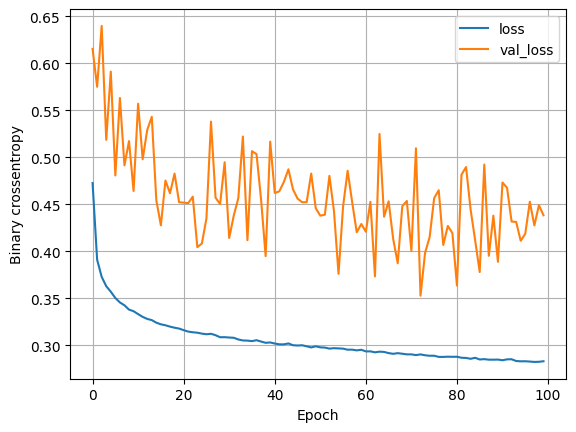

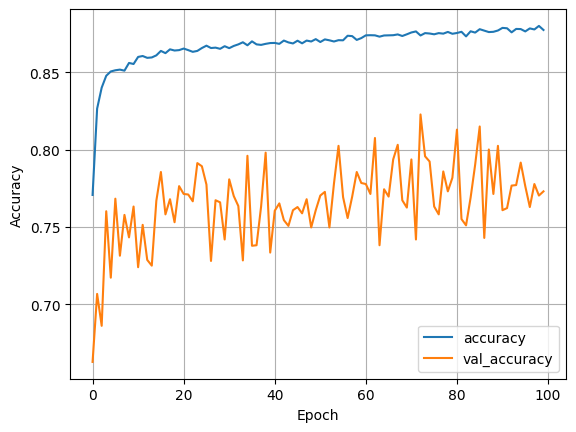

In [41]:
plot_loss(history)
plot_accuracy(history)